In [35]:
import os, shutil

In [36]:
base_dir = r'C:\Users\localadmin\Artificial-Intelligence-Python\Lab\small'

In [38]:
train_dir = os.path.join(base_dir, 'train')

In [39]:
train_dir

'C:\\Users\\localadmin\\Artificial-Intelligence-Python\\Lab\\small\\train'

In [40]:
validation_dir = os.path.join(base_dir, 'validation')

In [41]:
validation_dir

'C:\\Users\\localadmin\\Artificial-Intelligence-Python\\Lab\\small\\validation'

In [42]:
test_dir = os.path.join(base_dir, 'test')

In [43]:
test_dir

'C:\\Users\\localadmin\\Artificial-Intelligence-Python\\Lab\\small\\test'

In [44]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [45]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [48]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58843136/58889256 [============================>.] - ETA: 0s

In [49]:

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [50]:

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [51]:
conv_base

In [52]:

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [55]:
#this before using the .flow.from.preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [56]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [60]:
images, labels = train_generator.next()

In [62]:
images.shape

(32, 150, 150, 3)

In [64]:
images[0].shape

(150, 150, 3)

In [65]:
import matplotlib.pyplot as plt

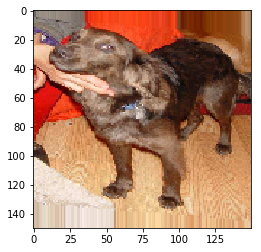

In [79]:
plt.imshow(images[2])

In [71]:
plt.show()

In [75]:
plt.subplot(images[0])

TypeError: unhashable type: 'numpy.ndarray'